In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg as la
import pickle
import os.path

import qiskit
from qiskit import Aer
from qiskit import IBMQ
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info import state_fidelity
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.circuit import Parameter
from qiskit.providers.aer import noise
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)
import datetime

In [21]:
IBMQ.load_account()

#provider = IBMQ.get_provider(group='open')
provider = IBMQ.get_provider(hub='ibm-q-sherbrooke', group='iq-staff', project='quantum-dynamics')
provider.backends()

ibmqfactory.load_account:WARNING:2021-01-07 15:40:02,875: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-sherbrooke', group='iq-staff', project='quantum-dynamics')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q-sherbrooke', group='iq-staff', project='quantum-dynamics')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q-sherbrooke', group='iq-staff', project='quantum-dynamics')>,
 <IBMQBackend('ibmq_boeblingen') from IBMQ(hub='ibm-q-sherbrooke', group='iq-staff', project='quantum-dynamics')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q-sherbrooke', group='iq-staff', project='quantum-dynamics')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q-sherbrooke', group='iq-staff', project='quantum-dynamics')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-sherbrooke', group='iq-staff', project='quantum-dynamics')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-sherbrooke', group='iq-staff', project='quantum-dynamics')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q-sherbrooke', group='iq-staff', project='quantu

In [36]:
qc='ibmq_toronto'
qc = 'ibmq_16_melbourne'
qc = 'ibmq_casablanca'
qc = 'ibmq_16_melbourne'
qc = 'ibmq_manhattan'
#qc='ibmq_santiago'
#qc='ibmqx2'
#qc = 'ibmq_qasm_simulator'
backend = provider.get_backend(qc)
import networkx as nx
import itertools

In [37]:
len(backend.active_jobs())

2

In [38]:
for b in provider.backends():
    print(b,b.configuration().n_qubits)

ibmq_qasm_simulator 32
ibmqx2 5
ibmq_16_melbourne 15
ibmq_boeblingen 20
ibmq_vigo 5
ibmq_ourense 5
ibmq_valencia 5
ibmq_armonk 1
ibmq_athens 5
ibmq_rome 5
ibmq_toronto 27
ibmq_santiago 5
ibmq_bogota 5
ibmq_manhattan 65
ibmq_casablanca 7
ibmq_sydney 27


In [39]:
prop=backend.properties()

In [40]:
prop.gate_property('cx')

{(0,
  10): {'gate_error': (0.014172721622707857,
   datetime.datetime(2021, 1, 7, 9, 43, 19, tzinfo=tzutc())), 'gate_length': (4.622222222222222e-07,
   datetime.datetime(2021, 1, 6, 17, 14, 2, tzinfo=tzutc()))},
 (10,
  0): {'gate_error': (0.014172721622707857,
   datetime.datetime(2021, 1, 7, 9, 43, 19, tzinfo=tzutc())), 'gate_length': (4.977777777777778e-07,
   datetime.datetime(2021, 1, 6, 17, 14, 2, tzinfo=tzutc()))},
 (9,
  8): {'gate_error': (0.025359404038998307,
   datetime.datetime(2021, 1, 7, 9, 43, 19, tzinfo=tzutc())), 'gate_length': (5.475555555555556e-07,
   datetime.datetime(2021, 1, 6, 17, 14, 2, tzinfo=tzutc()))},
 (8,
  9): {'gate_error': (0.025359404038998307,
   datetime.datetime(2021, 1, 7, 9, 43, 19, tzinfo=tzutc())), 'gate_length': (5.831111111111111e-07,
   datetime.datetime(2021, 1, 6, 17, 14, 2, tzinfo=tzutc()))},
 (17,
  11): {'gate_error': (0.012429385842968044,
   datetime.datetime(2021, 1, 7, 9, 37, 58, tzinfo=tzutc())), 'gate_length': (2.986666666666666

In [41]:
prop.gate_error('cx', [3,5])

BackendPropertyError: 'Could not find the desired property for cx'

In [42]:
prop.readout_error(0)

0.029400000000000093

In [43]:
prop.qubit_property(0)

{'T1': (7.032775630085315e-05,
  datetime.datetime(2021, 1, 7, 6, 36, 32, tzinfo=tzutc())),
 'T2': (0.00010673801226352282,
  datetime.datetime(2021, 1, 7, 6, 38, 46, tzinfo=tzutc())),
 'frequency': (4838247193.396503,
  datetime.datetime(2021, 1, 7, 16, 14, 2, tzinfo=tzutc())),
 'anharmonicity': (-331425769.954855,
  datetime.datetime(2021, 1, 7, 16, 14, 2, tzinfo=tzutc())),
 'readout_error': (0.029400000000000093,
  datetime.datetime(2021, 1, 7, 6, 33, 57, tzinfo=tzutc())),
 'prob_meas0_prep1': (0.038000000000000034,
  datetime.datetime(2021, 1, 7, 6, 33, 57, tzinfo=tzutc())),
 'prob_meas1_prep0': (0.0208,
  datetime.datetime(2021, 1, 7, 6, 33, 57, tzinfo=tzutc())),
 'readout_length': (5.351111111111111e-06,
  datetime.datetime(2021, 1, 7, 6, 33, 57, tzinfo=tzutc()))}

In [44]:
config=backend.configuration()

In [45]:
cm=config.coupling_map

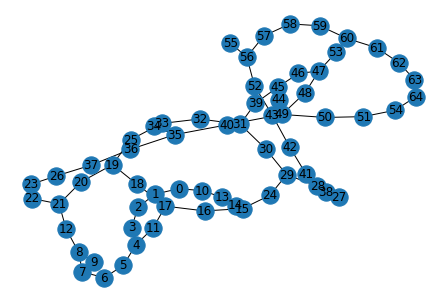

In [47]:
G=nx.Graph(cm)
nx.draw_spring(G, with_labels=True)

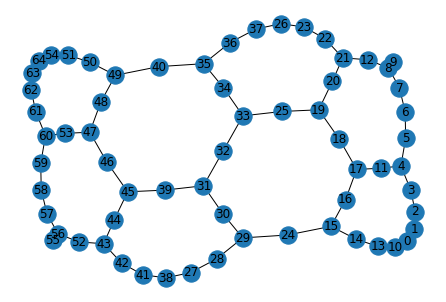

In [53]:
nx.draw_spectral(G, with_labels=True)

In [ ]:
import networkx as nx
import itertools

npath = 5
required_max_path_length = npath-1 # (inferior or equal to)

all_paths = []
nodes_combs = itertools.combinations(G.nodes, 2)

for source, target in nodes_combs:
    paths = nx.all_simple_paths(G, source=source, target=target, cutoff=required_max_path_length)

    for path in paths:
        if path not in all_paths and path[::-1] not in all_paths:
            if len(path)==npath:
                all_paths.append(path)

for path in all_paths:
    print(path)

In [ ]:
cx_errors = []
for p in all_paths:
    error = []
    for i in range(len(p)-1):
        error.append(prop.gate_error('cx', [p[i],p[i+1]]))
    cx_errors.append(error)
cx_errors = np.array(cx_errors)

In [ ]:
cx_max_errors = np.max(cx_errors, axis=1)
best_qubits = all_paths[np.argmin(cx_max_errors)]

In [ ]:
best_qubits

In [ ]:
cx_max_errors

In [ ]:
np.min(cx_max_errors)

In [ ]:
all_paths

In [20]:
backend.job_limit()

BackendJobLimit(active_jobs=0, maximum_jobs=None)

In [27]:
for i in np.arange(len(backend.active_jobs())):
    a=backend.active_jobs()[0]
    print(a.creation_date())
    a.cancel()

C:\Users\rafae\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The creation date is returned in local time now, rather than UTC.
  This is separate from the ipykernel package so we can avoid doing imports until


2021-01-07 16:00:19.214000+01:00
2021-01-07 16:00:17.598000+01:00
2021-01-07 16:00:15.709000+01:00
2021-01-07 16:00:13.954000+01:00
2021-01-07 16:00:12.054000+01:00


In [ ]:
prop

In [ ]:
pickle.dump(prop, open('test.pickle' , "ab" ) )

In [ ]:
t=pickle.load(open('test.pickle','rb'))

In [ ]:
t

In [ ]:
t.gate_error('cx',[0,1])

In [14]:
config

QasmBackendConfiguration(allow_object_storage=True, allow_q_object=True, backend_name='ibmq_16_melbourne', backend_version='2.3.5', basis_gates=['id', 'u1', 'u2', 'u3', 'cx'], conditional=False, coupling_map=[[0, 1], [0, 14], [1, 0], [1, 2], [1, 13], [2, 1], [2, 3], [2, 12], [3, 2], [3, 4], [3, 11], [4, 3], [4, 5], [4, 10], [5, 4], [5, 6], [5, 9], [6, 5], [6, 8], [7, 8], [8, 6], [8, 7], [8, 9], [9, 5], [9, 8], [9, 10], [10, 4], [10, 9], [10, 11], [11, 3], [11, 10], [11, 12], [12, 2], [12, 11], [12, 13], [13, 1], [13, 12], [13, 14], [14, 0], [14, 13]], credits_required=True, description='15 qubit device', dt=2.2222222222222221e-10, dtm=2.2222222222222221e-10, dynamic_reprate_enabled=False, gates=[GateConfig(id, [], gate id q { U(0,0,0) q; }, [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]]), GateConfig(u1, ['lambda'], gate u1(lambda) q { U(0,0,lambda) q; }, [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]]), GateConfig(u2, [

In [ ]:
config.